## Enviroment

In [ ]:
import os
print(os.getcwd())
try:
    os.chdir('../../Workshop001_Data_Engineering/')
except FileNotFoundError:
    print("""
        Posiblemente ya ejecutaste este bloque dos o más veces o tal vez el directorio está incorrecto. 
        ¿Ya ejecutaste este bloque antes y funcionó? Recuerda no ejecutarlo de nuevo. 
        ¿Estás en el directorio incorrecto? Puedes cambiarlo. 
        Recuerda el directorio donde estás:
        """)
print(os.getcwd())

Necesitamos editar el workdir, pues el directorio de trabajo está en ../../Workshop001_Data_Engineering/notebooks, lo que hace que, para él, no exista el paquete database (que si lo vemos de forma más detallada, sería que más o menos este buscando el paquete database dentro de la carpeta notebooks, cosa que no existe)

## Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from function.database.database import create_engine_postgres

## Extraction

In [3]:
engine = create_engine_postgres()
query = 'SELECT * FROM candidates_raw'
df = pd.read_sql_query(query, engine)
df.head(4)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   First Name                 50000 non-null  object
 1   Last Name                  50000 non-null  object
 2   Email                      50000 non-null  object
 3   Application Date           50000 non-null  object
 4   Country                    50000 non-null  object
 5   YOE                        50000 non-null  int64 
 6   Seniority                  50000 non-null  object
 7   Technology                 50000 non-null  object
 8   Code Challenge Score       50000 non-null  int64 
 9   Technical Interview Score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


## EDA - Data Raw

### Reemplazar algunos tipos de datos en algunas columnas para el analisis de correlación

Busco reemplazar los valores de las columnas 'Seniority' y 'Technology' de tipo String a Int para realizar un analisis de correlación, ya que sería interesante ver si influye el seniority y el titulo en la efectividad que tiene el postulado en el puntaje de la prueba. En este EDA se utiliza para ver si hay datos atipicos

In [4]:
print(df.nunique())


First Name                    3007
Last Name                      474
Email                        49833
Application Date              1646
Country                        244
YOE                             31
Seniority                        7
Technology                      24
Code Challenge Score            11
Technical Interview Score       11
dtype: int64


In [5]:
print(df['Technology'].unique())
print('--------------------------------')
print(df['Seniority'].unique())

['Data Engineer' 'Client Success' 'QA Manual'
 'Social Media Community Management' 'Adobe Experience Manager' 'Sales'
 'Mulesoft' 'DevOps' 'Development - CMS Backend' 'Salesforce'
 'System Administration' 'Security' 'Game Development'
 'Development - CMS Frontend' 'Security Compliance'
 'Development - Backend' 'Design'
 'Business Analytics / Project Management' 'Development - Frontend'
 'Development - FullStack' 'Business Intelligence'
 'Database Administration' 'QA Automation' 'Technical Writing']
--------------------------------
['Intern' 'Mid-Level' 'Trainee' 'Junior' 'Lead' 'Architect' 'Senior']


In [ ]:
df['Seniority_INT'] = df['Seniority'].replace({'Intern':1, 'Mid-Level':2, 'Trainee':3, 'Junior':4, 'Lead':5, 'Architect':6, 'Senior':7})
df['Technology_INT'] = df['Technology'].replace(
    {
  "Data Engineer": 1,
  "Client Success": 2,
  "QA Manual": 3,
  "Social Media Community Management": 4,
  "Adobe Experience Manager": 5,
  "Sales": 6,
  "Mulesoft": 7,
  "DevOps": 8,
  "Development - CMS Backend": 9,
  "Salesforce": 10,
  "System Administration": 11,
  "Security": 12,
  "Game Development": 13,
  "Development - CMS Frontend": 14,
  "Security Compliance": 15,
  "Development - Backend": 16,
  "Design": 17,
  "Business Analytics / Project Management": 18,
  "Development - Frontend": 19,
  "Development - FullStack": 20,
  "Business Intelligence": 21,
  "Database Administration": 22,
  "QA Automation": 23,
  "Technical Writing": 24
}
)


In [7]:
df.head(20)


,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score,Seniority_INT,Technology_INT
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,1,1
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,1,1
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,2,2
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,3,3
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,2,4
5,Alec,Abbott,juanita_hansen@gmail.com,2019-08-17,Zimbabwe,8,Junior,Adobe Experience Manager,2,9,4,5
6,Allison,Jacobs,alba_rolfson27@yahoo.com,2018-05-18,Wallis and Futuna,19,Trainee,Sales,2,9,3,6
7,Nya,Skiles,madisen.zulauf@gmail.com,2021-12-09,Myanmar,1,Lead,Mulesoft,2,5,5,7
8,Mose,Lakin,dale_murazik@hotmail.com,2018-03-13,Italy,18,Lead,Social Media Community Management,7,10,5,4
9,Terrance,Zieme,dustin31@hotmail.com,2022-04-08,Timor-Leste,25,Lead,DevOps,2,0,5,8


In [17]:
df['Application Date'] = pd.to_datetime(df['Application Date'])

In [18]:
df.describe()

,Application Date,YOE,Code Challenge Score,Technical Interview Score,Seniority_INT,Technology_INT,years
count,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2020-04-03 23:04:14.592000,15.286980,4.996400,5.003880,3.979040,12.311220,2019.784080
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000,1.000000,2018.000000
25%,2019-02-17 00:00:00,8.000000,2.000000,2.000000,2.000000,7.000000,2019.000000
50%,2020-04-06 00:00:00,15.000000,5.000000,5.000000,4.000000,12.000000,2020.000000
75%,2021-05-21 00:00:00,23.000000,8.000000,8.000000,6.000000,18.000000,2021.000000
max,2022-07-04 00:00:00,30.000000,10.000000,10.000000,7.000000,24.000000,2022.000000
std,NaN,8.830652,3.166896,3.165082,2.001949,6.713913,1.315619


### Charts

<Axes: xlabel='years'>

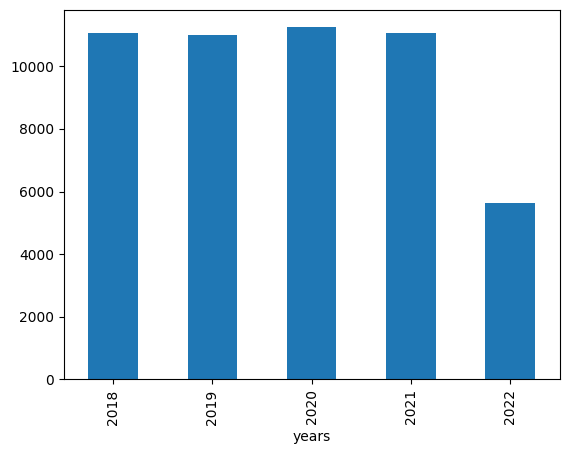

In [16]:
df['years'] = df['Application Date'].dt.year
df['years'].value_counts().sort_index().plot(kind='bar')

Se puede observar muy pocos datos en el año 2022, lo que podría indicar posibles sesgos en gráficos sobre todo que tenga que ver con el periodo 2022

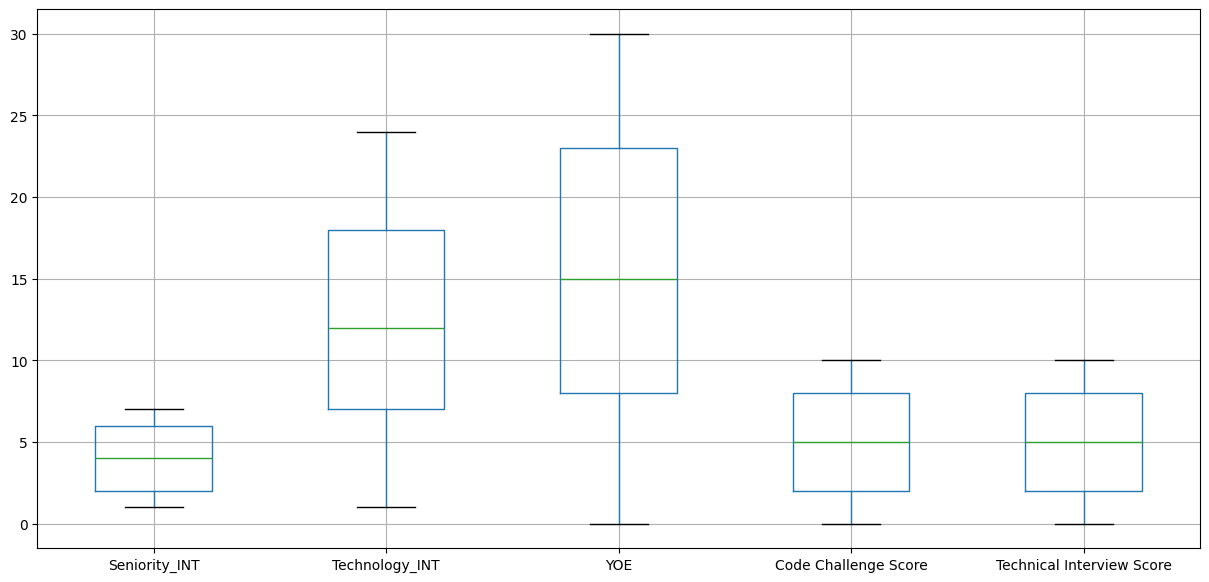

In [21]:
fig = plt.figure(figsize =(15, 7))
boxplot = df.boxplot(column=['Seniority_INT', 'Technology_INT', 'YOE', 'Code Challenge Score', 'Technical Interview Score'])
plt.show()

No existen valores atipicos que puedan interferir de manera negativa en la visualización de datos con dashboard, podríamos definir la función de limpieza en transformation teniendo en cuenta esta parte del EDA